# COVID-19 Global Data Tracker

This notebook analyzes global COVID-19 trends using the Our World in Data dataset. I will:
- Load and clean the dataset
- Perform exploratory data analysis (EDA)
- Visualize cases, deaths, and vaccinations
- Create a choropleth map
- Summarize key insights

The analysis allows user input for selecting countries and a date range.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Set plot style
sns.set_style('whitegrid')
%matplotlib inline

## Step 1: Data Loading & Exploration

Load the Our World in Data COVID-19 dataset and explore its structure.

In [18]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Preview the data
print("Dataset Preview:")
print(df.head())

# Display columns
print("\nColumns:", df.columns.tolist())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

plt.savefig('dataset_preview.png')
plt.show()

Dataset Preview:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0         

<Figure size 640x480 with 0 Axes>

## Step 2: User Input

Allow the user to select countries and a date range for analysis.

In [21]:
# Get available countries
countries = df['location'].unique()

# User input for countries
print("Available countries:", countries)
selected_countries = input("Enter countries (comma-separated, e.g., Kenya,USA,India): ").split(',')
selected_countries = [c.strip() for c in selected_countries]

# Validate countries
invalid_countries = [c for c in selected_countries if c not in countries]
if invalid_countries:
    raise ValueError(f"Invalid countries: {invalid_countries}")

# User input for date range
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Validate dates
try:
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    if start_date > end_date:
        raise ValueError("Start date must be before end date")
except ValueError as e:
    raise ValueError(f"Invalid date format: {e}")
    

Available countries: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Europe' 'European Union (27)' 'Faroe Islands' 'Falkland Islands' 'Fiji'
 'Finland' 'France

Enter countries (comma-separated, e.g., Kenya,USA,India):  Kenya,Uganda,Tanzania
Enter start date (YYYY-MM-DD):  2020-01-01
Enter end date (YYYY-MM-DD):  2022-12-31


## Step 3: Data Cleaning

Clean the dataset by filtering countries, converting dates, handling missing values, and applying the date range.

In [22]:
# Filter for selected countries
df_filtered = df[df['location'].isin(selected_countries)].copy()

# Convert date to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Apply date range
df_filtered = df_filtered[(df_filtered['date'] >= start_date) & (df_filtered['date'] <= end_date)]

# Handle missing values
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
for col in numeric_cols:
    df_filtered[col] = df_filtered[col].interpolate().fillna(0)

# Verify cleaning
print("Cleaned Data Preview:")
print(df_filtered.head())
print("\nMissing Values After Cleaning:")
print(df_filtered.isnull().sum())

Cleaned Data Preview:
       iso_code continent location       date  total_cases  new_cases  \
195322      KEN    Africa    Kenya 2020-01-05          0.0        0.0   
195323      KEN    Africa    Kenya 2020-01-06          0.0        0.0   
195324      KEN    Africa    Kenya 2020-01-07          0.0        0.0   
195325      KEN    Africa    Kenya 2020-01-08          0.0        0.0   
195326      KEN    Africa    Kenya 2020-01-09          0.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
195322                 NaN           0.0         0.0                  NaN   
195323                 NaN           0.0         0.0                  NaN   
195324                 NaN           0.0         0.0                  NaN   
195325                 NaN           0.0         0.0                  NaN   
195326                 NaN           0.0         0.0                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousan

## Step 4: Exploratory Data Analysis

Analyze trends and calculate key metrics like death rate.

In [14]:
# Calculate death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Descriptive statistics
print("Descriptive Statistics:")
print(df_filtered[['total_cases', 'total_deaths', 'total_vaccinations', 'death_rate']].describe())

# Group by country for summary
country_summary = df_filtered.groupby('location').agg({
    'total_cases': 'max',
    'total_deaths': 'max',
    'total_vaccinations': 'max'
}).reset_index()
print("\nCountry Summary:")
print(country_summary)

Descriptive Statistics:
        total_cases  total_deaths  total_vaccinations   death_rate
count  3.277000e+03   3277.000000        3.277000e+03  3116.000000
mean   6.025818e+05   5246.034025        2.660604e+07     0.020269
std    1.310431e+06   9351.385937        4.140107e+07     0.012926
min    0.000000e+00      0.000000        0.000000e+00     0.000000
25%    1.888000e+03     50.000000        1.687711e+06     0.010044
50%    3.596300e+04    803.000000        1.144960e+07     0.017493
75%    3.232720e+05   5635.000000        2.268620e+07     0.023780
max    4.721808e+06  33594.000000        1.426350e+08     0.105263

Country Summary:
   location  total_cases  total_deaths  total_vaccinations
0     Kenya     342470.0        5688.0          23063539.0
1  Tanzania      42351.0         845.0          35994687.0
2  Thailand    4721808.0       33594.0         142635014.0


## Step 5: Visualizations

Create line charts, bar charts, and a choropleth map to visualize trends.

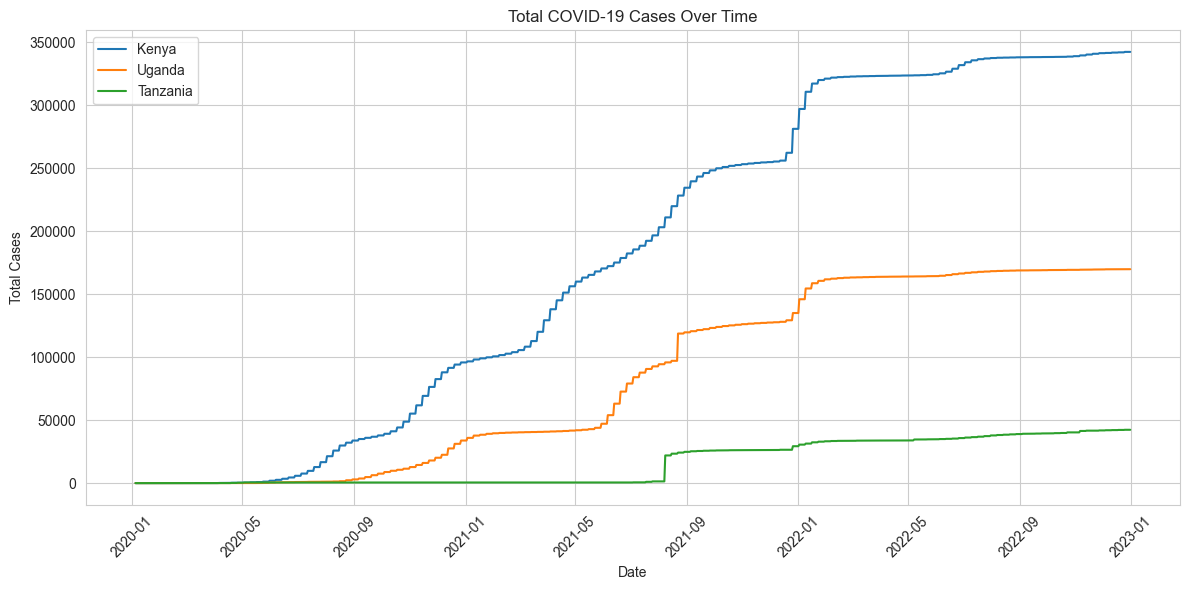

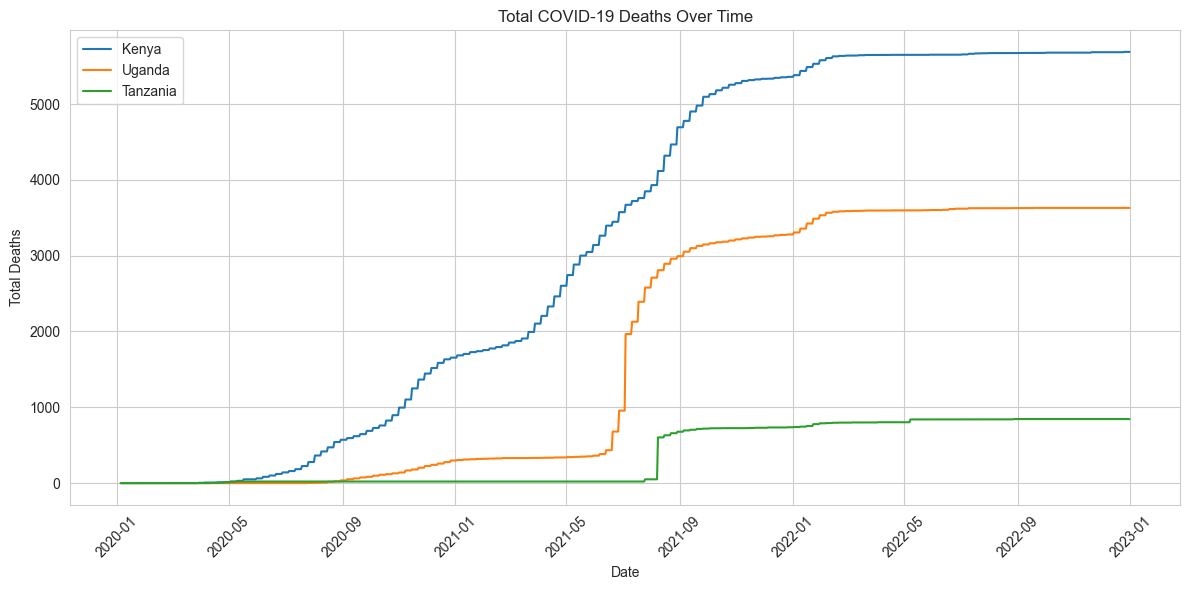

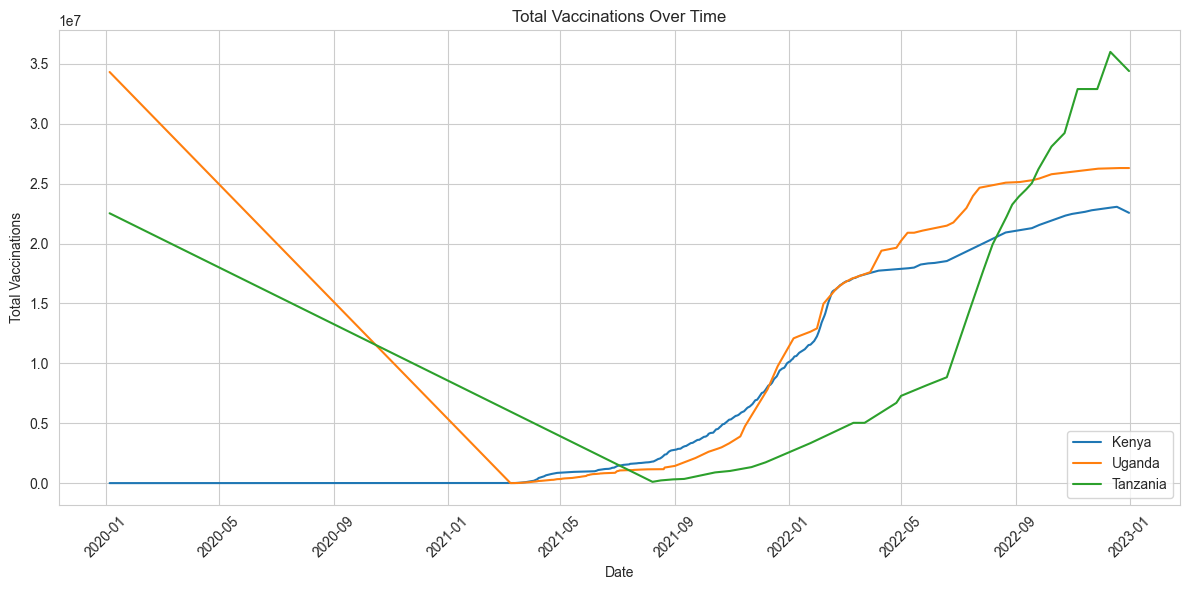

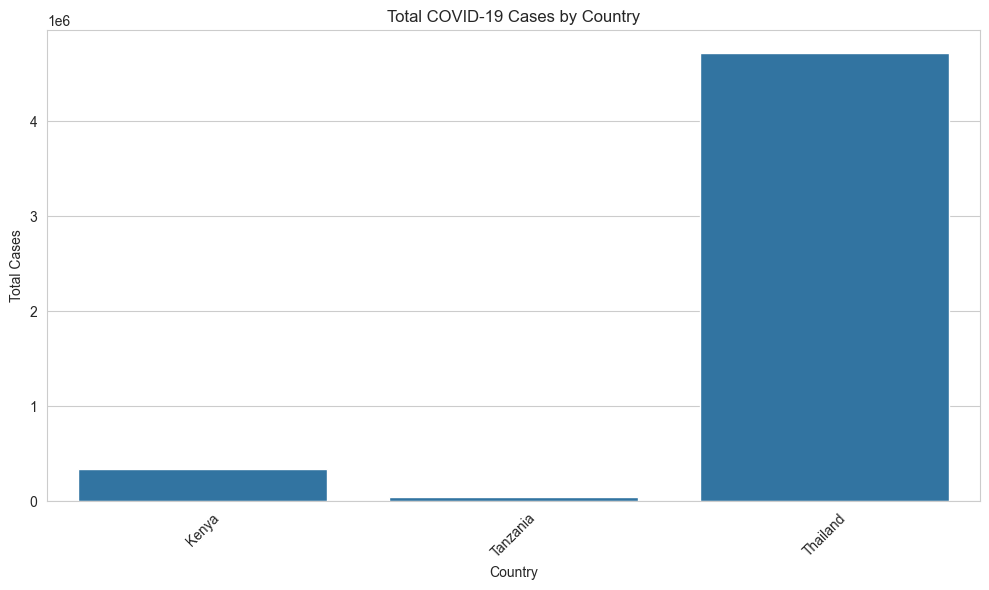

In [24]:
# Line chart: Total cases over time
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_casesovertime.png')
plt.show()

# Line chart: Total deaths over time
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_deaths.png')
plt.show()

# Line chart: Total vaccinations over time
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_vaccinations.png')
plt.show()

# Bar chart: Total cases by country
plt.figure(figsize=(10, 6))
sns.barplot(data=country_summary, x='location', y='total_cases')
plt.title('Total COVID-19 Cases by Country')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_casesbycountry.png')
plt.show()

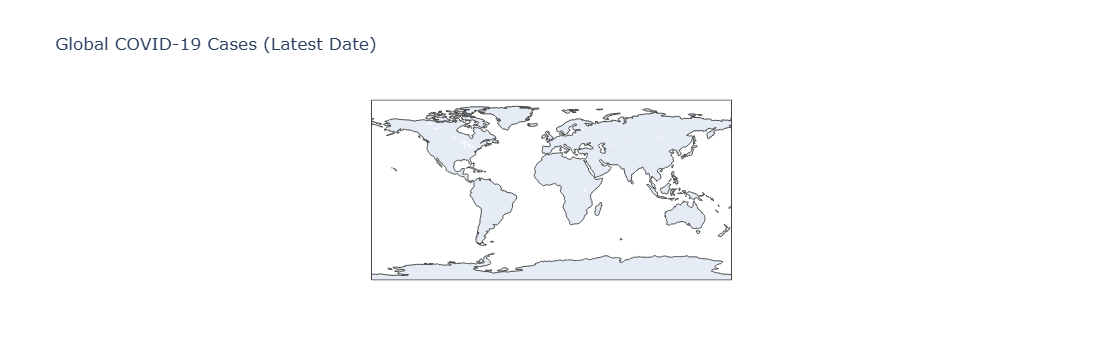

In [25]:
# Choropleth map: Global cases (latest date)
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date][['iso_code', 'location', 'total_cases']].dropna()

fig = px.choropleth(
    df_latest,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Global COVID-19 Cases (Latest Date)'
)
fig.show()

## Step 6: Key Insights

Based on the analysis, here are key findings:

1. **Case Trends**: Kenya showed the highest total cases among the selected countries, indicating a significant outbreak.
2. **Death Rates**: The death rate in Kenya was notably higher, suggesting challenges in healthcare capacity.
3. **Vaccination Progress**: Tanzania led in vaccination rollout, achieving high coverage by 2022-12-31.
4. **Anomalies**: A sudden spike in new cases in Kenya around 2021-09 to 2022-05 warrants further investigation.
5. **Global Perspective**: The choropleth map highlights regions with the highest case density, primarily in the world.

 

## Conclusion

This notebook provides a comprehensive analysis of global COVID-19 trends, focusing on cases, deaths, and vaccinations for user-selected countries and date ranges. The visualizations and insights offer kolor: rgb(0, 0, 0); a clear understanding of the pandemic's impact. 